# Churn prediction for fitness centers

## Data overview

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import plotly.graph_objects as go
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage 

In [2]:
# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading csv file and assigning the result to variable
gym = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

In [4]:
# displaying the head of the DataFrame
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


- Change column names to lowercase and snake case.

In [5]:
# renaming columns
gym.columns = ['gender',
                'near_location',
                'partner',
                'promo_friends',
                'phone',
                'contract_period',
                'group_visits',
                'age',
                'avg_additional_charges_total',
                'month_to_end_contract',
                'lifetime',
                'avg_class_frequency_total',
                'avg_class_frequency_current_month',
                'churn']

**Conclusion**

- Change column names to lowercase and snake case.

## Exploratory data analysis

- Check missing values, examining the means and standard deviations in the data set;
- Analyze the mean values of features in two groups - those who left and those who stayed;
- Plot bar graphs of feature distributions for those who left and those who stayed;
- Build a correlation matrix.

### Checking missing values, examining the means and standard deviations in the data set

In [6]:
# printing information about the DataFrame
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

- There are no gaps in the data set.

In [7]:
# checking for values in all columns 
for row in gym:
    print(row)
    print(gym[row].value_counts())
    print()

gender
1    2041
0    1959
Name: gender, dtype: int64

near_location
1    3381
0     619
Name: near_location, dtype: int64

partner
0    2053
1    1947
Name: partner, dtype: int64

promo_friends
0    2766
1    1234
Name: promo_friends, dtype: int64

phone
1    3614
0     386
Name: phone, dtype: int64

contract_period
1     2207
12     960
6      833
Name: contract_period, dtype: int64

group_visits
0    2351
1    1649
Name: group_visits, dtype: int64

age
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: age, dtype: int64

avg_additional_charges_total
89.952762     1
174.658455    1
122.765563    1
204.444527    1
50.813166     1
             ..
272.997181    1
115.130268    1
133.525137    1
201.447650    1
218.979321    1
Name: avg_additional_charges_total, Length: 4000, dtype: int64

month_to_end_con

- Change data type to boolean in columns `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits`, `churn`;
- Change data type to int in column `month_to_end_contract`.

In [8]:
# changing data type to boolean
gym[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']] = gym[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].astype(bool)

In [9]:
# changing data type to int
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(int)

In [10]:
# checking for duplicates
gym.duplicated().sum()

0

There are no duplicates

In [11]:
# computing a summary of statistics
gym.describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


There are no outliers in the data, the standard deviations are very close to the average, and the data is quite uniform.

Portrait of a typical client:

- An average client is 29 years old;
- the current active subscription is about 5 months long;
- 147 spent on additional services;
- before the end of the contract, on average, about 4 months remain;
- on average, it has been about 4 months since the first visit to the gym;
- the gym is visited about twice a week.

### Analyzing the mean values of features in two groups - those who left and those who stayed

In [12]:
# grouping by churn and checking the mean values
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
True,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We can conclude that those who stayed (churn = 0) often live nearby, work for the club's partner company, come to the club under the "bring a friend" promotion, have a subscription for 5.7 months, and attend group classes. Their average age is almost 30 years old. They bring in more total revenue from other services at the fitness center, and they have an average duration of 5.2 months for their current subscription. On average, the remaining clients have been using the fitness center for 4.7 months and they attend classes twice a week.

### Plotting bar graphs of feature distributions for those who left and those who stayed

In [13]:
# breaking down the features by type "bool" and non "bool"
bool_features = [] 
non_bool_features = []

for col in (gym.columns.tolist()):
    if gym[col].dtype == 'bool':
        bool_features.append(col)
    else:
        non_bool_features.append(col)

In [14]:
# displaying on the screen
print('Bool-features:', bool_features, '\n\nNumerical features:', non_bool_features)

Bool-features: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn'] 

Numerical features: ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


In [15]:
# removing the churn column from bool_features
bool_features.remove('churn')

# displaying on the screen
print(bool_features)

['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']


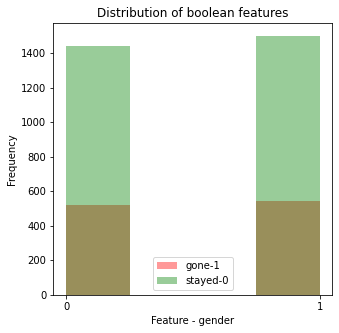

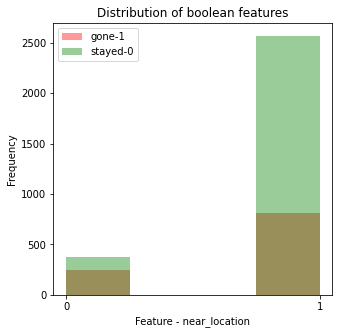

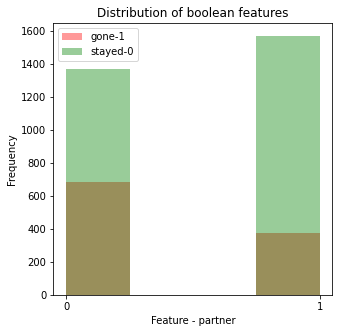

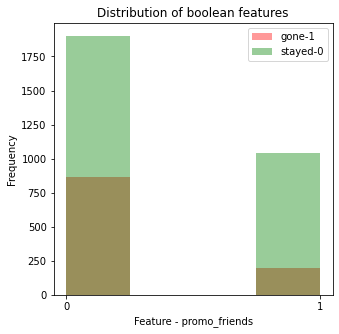

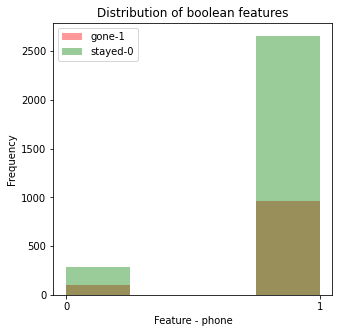

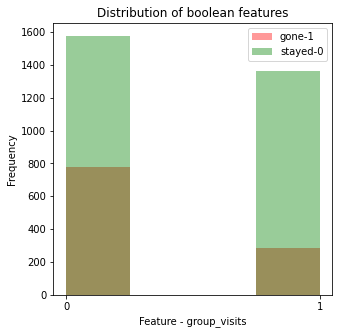

In [16]:
# plotting the distribution of boolean features
for i in bool_features:
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title('Distribution of boolean features')
    sns.distplot(gym.query('churn == 1')[i].astype(int), bins=4, kde=False, color='r',label='gone-1')
    sns.distplot(gym.query('churn == 0')[i].astype(int), bins=4, kde=False, color='g',label='stayed-0')
    plt.xlabel(f'Feature - {i}')
    plt.ylabel('Frequency')
    ax.set_xticks([0,1])
    ax.legend()
    plt.show()

- In terms of `gender`, there are about the same number of female and male customers, and about the percentage of lost customers. As a result, a client's decision to leave has nothing to do with his/her gender. Models cannot be trained using this feature;

- In terms of `near_location`, the proportion of customers who left for option 1 is less than half, and the proportion who left for option 0 is more than half. That is, the outflow is more for customers who live/work far from the gym;

- In terms of `partner`, customers from partner companies and other customers have similar shares. Partners, however, have a much lower share of those who left. We must work more actively with partners, expand their networks, and attract more such customers;

- In terms of `promo_friends`, while fewer people are participating in the promo action, the share of those who remain is much higher. As a result of the campaign, loyal customers were collected;

- In terms of `phone`, the proportion of customers who have left their phone number is approximately the same for options 1 and 0. Therefore, a client's decision to leave has nothing to do with whether or not they left their phone number;

- In terms of `group_visits`, the churn rate among those who don't attend group classes is higher than that among those who do.

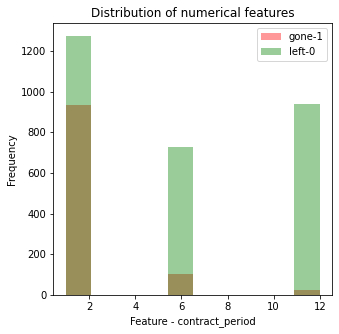

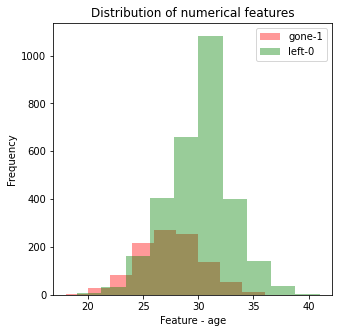

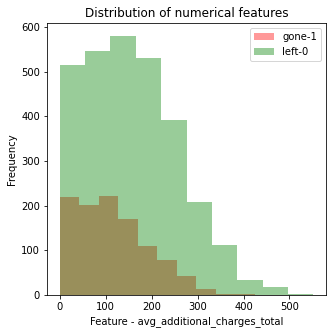

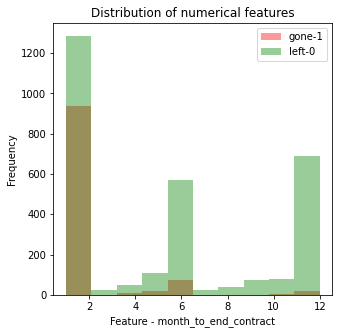

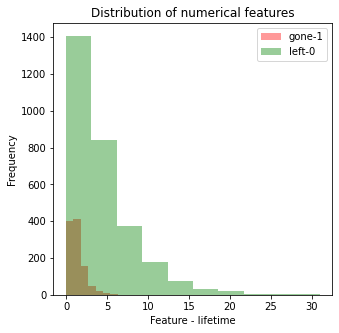

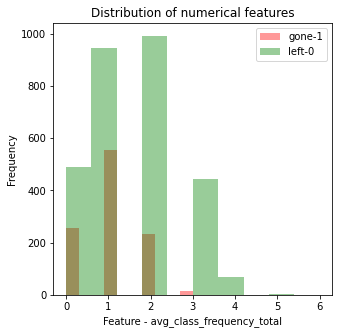

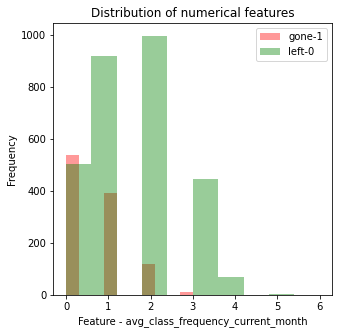

In [17]:
# plotting the distribution of numerical features
for i in non_bool_features:
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title('Distribution of numerical features')
    sns.distplot(gym.query('churn == 1')[i].astype(int), bins=10, kde=False, color='r',label='gone-1')
    sns.distplot(gym.query('churn == 0')[i].astype(int), bins=10, kde=False, color='g',label='left-0')
    plt.xlabel(f'Feature - {i}')
    plt.ylabel('Frequency')
    ax.legend()
    plt.show()

- In terms of `contract_period`, most of the outflow comes from those who take a subscription for a month. The smallest outflow comes from those who take a subscription for a year. These are the most stable customers;

- In terms of `age`, clients aged 24-30 are more likely to leave, but older clients are more likely to stay;

- In terms of `avg_additional_charges_total`, those who spend less than 350 on additional services tend to leave;

- In terms of `month_to_end_contract`, the main churn is among customers with 1 month remaining on their subscription. The more time left, the stronger the desire to continue going to gym;

- In terms of `lifetime`, most outflows come from people who go to the gym for less than five months;

- In terms of `avg_class_frequency_total`, the gym churn rate is higher for ciustomers who visit up to two times a week. If the client visits three times or more, the outflow is minimal, or none at all. But such customers are rare;

- In terms of `avg_class_frequency_current_month`, the higher the frequency of club visits, the lower the churn rate. 

### Building a correlation matrix

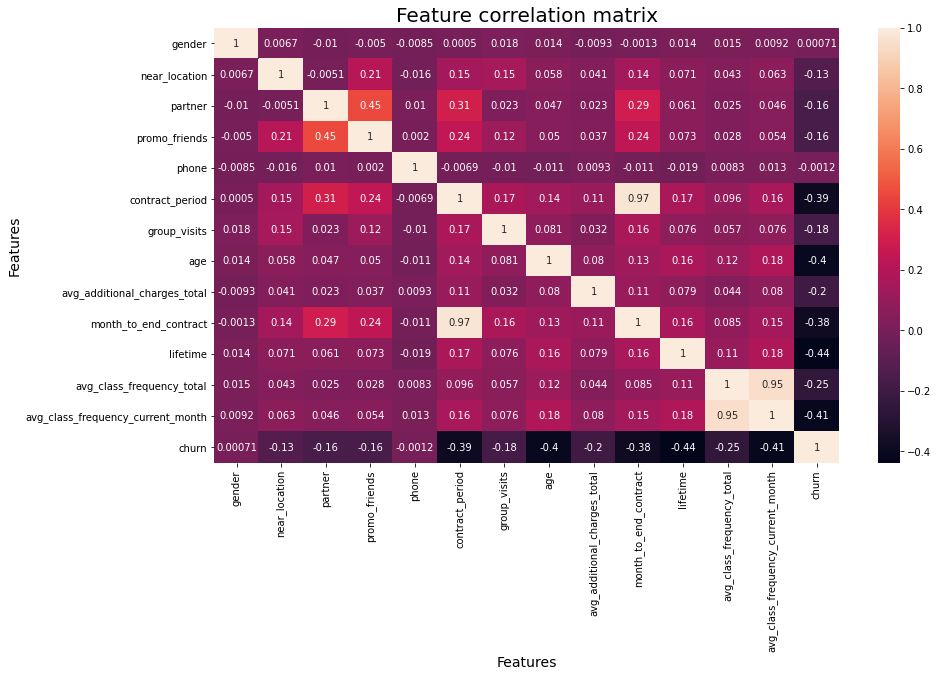

In [18]:
# plotting a correlation matrix
matrix = gym.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matrix, annot = True, square=False)
plt.title('Feature correlation matrix', fontsize = 20)
plt.xlabel('Features', fontsize = 14) 
plt.ylabel('Features', fontsize = 14) 
plt.show()

The feature correlation matrix suggests that all features are weakly correlated. There is an inverse correlation between `churn` and the rest of the features - the stronger the feature, the weaker the churn.

There is a very strong (above 0.95) correlation of feature pairs:
- `contract_period` and `month_to_end_contract` - the longer the subscription period, the more likely there are still months left;
- `avg_class_frequency_current_month` and `avg_class_frequency_total` - those who have been visiting regularly for a long time is probably visiting on the same schedule for the past month.

In [19]:
# removing one feature from a pair of correlated features
gym = gym.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

**Conclusion**

- There are 4000 records in the table, which is sufficient for forecasting;
- The data is complete, without gaps or duplicates;
- Columns gender, near_location, partner, promo_friends, phone, group_visits, churn are now bools;
- Column month_to_end_contract column is now integer;
- There are no strong outliers in the table, the standard deviations are reasonable, the data is quite uniform. 

**Exploratory data analysis:**

1. We can conclude that those who stayed (churn = 0) often live nearby, work for the club's partner company, come to the club under the "bring a friend" promotion, have a subscription for 5.7 months, and attend group classes. Their average age is almost 30 years old. They bring in more total revenue from other services at the fitness center, and they have an average duration of 5.2 months for their current subscription. On average, the remaining clients have been using the fitness center for 4.7 months and they attend classes twice a week.

2. Our analysis of the features of those who left (churn) and those who stayed shows the following:

    - In terms of `gender`, there are about the same number of female and male customers, and about the percentage of lost customers. As a result, a client's decision to leave has nothing to do with his/her gender. Models cannot be trained using this feature;

    - In terms of `near_location`, the proportion of customers who left for option 1 is less than half, and the proportion who left for option 0 is more than half. That is, the outflow is more for customers who live/work far from the gym;

    - In terms of `partner`, customers from partner companies and other customers have similar shares. Partners, however, have a much lower share of those who left. We must work more actively with partners, expand their networks, and attract more such customers;

    - In terms of `promo_friends`, while fewer people are participating in the promo action, the share of those who remain is much higher. As a result of the campaign, loyal customers were collected;

    - In terms of `phone`, the proportion of customers who have left their phone number is approximately the same for options 1 and 0. Therefore, a client's decision to leave has nothing to do with whether or not they left their phone number;

    - In terms of `group_visits`, the churn rate among those who don't attend group classes is higher than that among those who do.

    - In terms of `contract_period`, most of the outflow comes from those who take a subscription for a month. The smallest outflow comes from those who take a subscription for a year. These are the most stable customers;

    - In terms of `age`, clients aged 24-30 are more likely to leave, but older clients are more likely to stay;

    - In terms of `avg_additional_charges_total`, those who spend less than 350 on additional services tend to leave;

    - In terms of `month_to_end_contract`, the main churn is among customers with 1 month remaining on their subscription. The more time left, the stronger the desire to continue going to gym;

    - In terms of `lifetime`, most outflows come from people who go to the gym for less than five months;

    - In terms of `avg_class_frequency_total`, the gym churn rate is higher for ciustomers who visit up to two times a week. If the client visits three times or more, the outflow is minimal, or none at all. But such customers are rare;

    - In terms of `avg_class_frequency_current_month`, the higher the frequency of club visits, the lower the churn rate. 

3. The feature correlation matrix suggests that all features are weakly correlated. There is an inverse correlation between `churn` and the rest of the features - the stronger the feature, the weaker the churn.

There is a very strong (above 0.95) correlation of feature pairs:
- `contract_period` and `month_to_end_contract` - the longer the subscription period, the more likely there are still months left;
- `avg_class_frequency_current_month` and `avg_class_frequency_total` - those who have been visiting regularly for a long time is probably visiting on the same schedule for the past month.
- Removed `month_to_end_contract`, `avg_class_frequency_current_month` features from pairs of correlated features as they can negatively affect model training.

## Building a customer churn forecasting model

- Create a binary classification model of customers based on the fact that a customer is likely to churn within the next month:
    - Split the data into training and validation samples using the train_test_split() function.
    - Train the model on the train sample using two ways: logistic regression and random forest.
    - Evaluate the accuracy, precision and recall metrics.

### Spliting the data into training and validation samples using the train_test_split() function

In [20]:
# dividing the data into features (matrix X) and target variable (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

In [21]:
# dividing the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [22]:
# creating an object of the StandardScaler class and applying it to the training sample
scaler = StandardScaler()

# training scaler and simultaneously transforming the matrix for the training sample
X_train_st = scaler.fit_transform(X_train)

# displaying on screen
display(X_train_st[:5])

# standardizing the feature matrix for the test sample
X_test_st = scaler.transform(X_test)

array([[ 0.98265048,  0.42368158,  1.03175391, -0.65709005,  0.32751555,
         0.29763717,  1.19034383,  0.55025283, -0.92337193, -0.19265756,
        -1.92902575],
       [ 0.98265048,  0.42368158, -0.96922337, -0.65709005,  0.32751555,
         1.62230884,  1.19034383, -1.28583586,  0.16252804, -0.46105294,
         1.33328297],
       [-1.01765584,  0.42368158, -0.96922337,  1.52186142,  0.32751555,
         0.29763717,  1.19034383,  0.24423805,  0.30907146, -0.46105294,
        -0.76508827],
       [-1.01765584,  0.42368158,  1.03175391,  1.52186142,  0.32751555,
         0.29763717,  1.19034383, -1.28583586, -0.99057964, -0.99784369,
         0.51992504],
       [-1.01765584,  0.42368158, -0.96922337,  1.52186142, -3.05329013,
         1.62230884,  1.19034383, -0.06177673,  0.02573737, -0.46105294,
        -0.29392092]])

### Training the model on the train sample using two ways: logistic regression and random forest

#### Logistic regression

In [23]:
# defining an algorithm for our model
model = LogisticRegression(solver='liblinear') 

# training the model
model.fit(X_train, y_train)

# using an already trained model to make predictions
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

# displaying all metrics
print('Prediction Model - "Logistic Regression"')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Prediction Model - "Logistic Regression"
Accuracy: 0.90
Precision: 0.83
Recall: 0.80


#### Random forest

In [24]:
# defining an algorithm for our model 
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# training a random forest model
rf_model.fit(X_train_st, y_train)

# using an already trained model to make predictions
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

# displaying all metrics
print('Prediction Model - "Random Forest"')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Prediction Model - "Random Forest"
Accuracy: 0.89
Precision: 0.81
Recall: 0.79


### Evaluating the accuracy, precision and recall metrics

In all respects, "Logistic Regression" gives a slightly better result than "Random Forest":
- the Accuracy parameter suggests that "Logistic regression" outperforms "Random forest" slightly (0.90 vs. 0.89);
- the Precision parameter suggests that "Logistic regression" outperforms "Random Forest" slightly (0.83 vs. 0.81);
- the Recall parameter suggests that "Logistic regression" outperforms "Random Forest" slightly (0.80 vs. 0.79).

Both models have a very high Accuracy (over 0.89), Precision and Recall (in the range of 0.79 - 0.83).

**Conclusion**

While both models performed well, "Logistic Regression" performed slightly better:
- the Accuracy parameter suggests that "Logistic regression" outperforms "Random forest" slightly (0.90 vs. 0.89);
- the Precision parameter suggests that "Logistic regression" outperforms "Random Forest" slightly (0.83 vs. 0.81);
- the Recall parameter suggests that "Logistic regression" outperforms "Random Forest" slightly (0.80 vs. 0.79).

## Clustering

- Standardize data;
- Build a distance matrix using the linkage() function and draw a dendrogram. Identify how many clusters there are;
- Train a clustering model based on the K-Means algorithm and predicting customer clusters;
- Identify feature mean values for clusters;
- Plot feature distributions for clusters;
- Identify each cluster's outflow share.

### Standardizing data

In [25]:
# standardizing data
sc = StandardScaler()

# training sc and simultaneously transforming the matrix for the training sample
X_sc = sc.fit_transform(X)

# displaying on the screen
X_sc[:3]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121, -0.19332863,
        -1.91191971],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  0.87368001,
         0.04517569],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.46008079,
        -0.02049263]])

### Building a distance matrix using the linkage() function and drawing a dendrogram. Identifying how many clusters there are.

In [26]:
# passing the standardized table as a parameter to the linkage() function
# to make the chart more representative, it is better to pass the value 'ward' to the method parameter
linked = linkage(X_sc, method = 'ward')

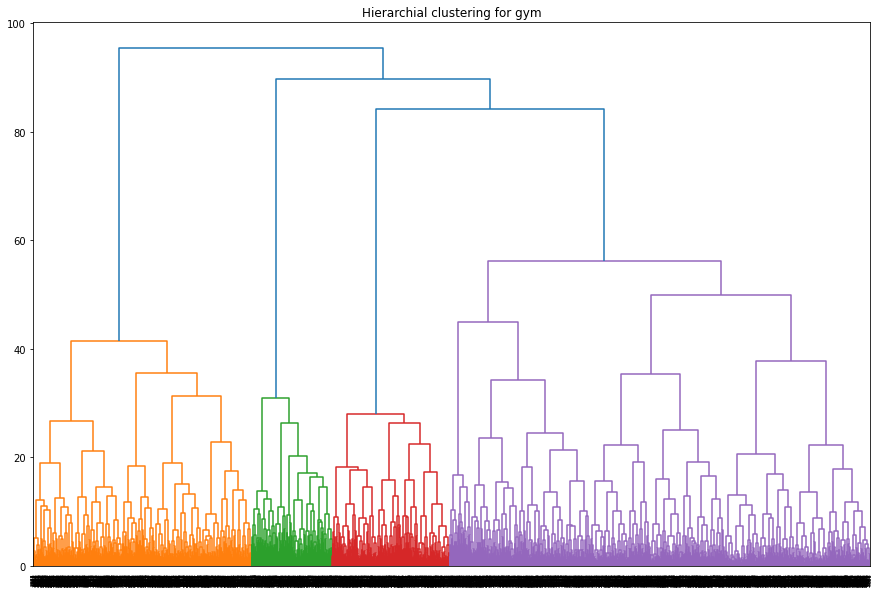

In [27]:
# plotting a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for gym')
plt.show()

Five large clusters of clients can be identified on the dendrogram.

### Training a clustering model based on the K-Means algorithm and predicting customer clusters

In [28]:
# setting the model k_means with the number of clusters 5
km = KMeans(n_clusters=5, random_state=0)

# predicting clusters for observations (the algorithm assigns them numbers from 0 to 2)
labels = km.fit_predict(X_sc)

# displaying on the screen
labels

array([4, 3, 2, ..., 1, 1, 4], dtype=int32)

In [29]:
# saving the cluster labels in our dataset
gym['cluster_km'] = labels

# displaying on the screen
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
0,True,True,True,True,False,6,True,29,14.227470,3,0.020398,False,4
1,False,True,False,False,True,12,True,31,113.202938,7,1.922936,False,3
2,False,True,True,False,True,1,False,28,129.448479,2,1.859098,False,2
3,False,True,True,True,True,12,True,33,62.669863,2,3.205633,False,1
4,True,True,True,True,True,1,False,26,198.362265,3,1.113884,False,1


In [30]:
# calculating the number of clients in each cluster
gym.groupby('cluster_km')['gender'].count()

cluster_km
0     561
1    1050
2    1132
3     871
4     386
Name: gender, dtype: int64

There are 386 clients in the smallest group and 1132 clients in the largest group.

**Calculating silhouette metrics for clustering**

In [31]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


A silhouette score can range from -1 to 1. The closer to 1, the better the clustering. Based on the Silhouette_score = 0.14, the clustering wasn't very good.

### Identifying feature mean values for clusters

In [32]:
# displaying feature mean values for each cluster
gym.drop('churn', axis=1).groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.499109,0.488571,0.505300,0.544202,0.523316
near_location,0.000000,0.995238,1.000000,1.000000,0.862694
partner,0.488414,0.955238,0.238516,0.250287,0.471503
promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
age,28.721925,29.543810,28.770318,29.536165,29.297927
avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
lifetime,3.060606,4.380952,3.343640,3.761194,3.940415


In [33]:
# calculating mean values for each feature
gym.drop(['cluster_km', 'churn'], axis = 1).mean()

gender                            0.510250
near_location                     0.845250
partner                           0.486750
promo_friends                     0.308500
phone                             0.903500
contract_period                   4.681250
group_visits                      0.412250
age                              29.184250
avg_additional_charges_total    146.943728
lifetime                          3.724750
avg_class_frequency_total         1.879020
dtype: float64

Clusters have the following characteristics:

Cluster 0:
- `near_location` - 100% live far away;
- `partner` - 49% of customers come from partner companies;
- `group_visits` - low level of group visits 23%;
- `lifetime` - almost 3 months since the first visit.

All of these clients live far away, almost half came through an affiliate program and visit only 3 months. Group classes are rare. The outflow will likely be large among these customers.

Cluster 1:
- `near_location` - live nearby to 99%;
- `partner` - partnership share 95%;
- `promo_friends` - recomended by a friend 89%;
- `contract_period` - almost 8 months;
- `group_visits` - the average level of attending group classes is 46%;
- `lifetime` - almost 5 months (the highest rate) since the first visit;
- `avg_class_frequency_total` is the highest 1.98%.

These clients live nearby, came through an affiliate program or promotion, have an 8-month contract, attend group classes, almost 5 months since first visit, attend twice a week. Most likely, the outflow of such customers will be minimal.

Cluster 2:
- `near_location` - 100% live nearby;
- `contract_period` - almost 3 months;
- `group_visits` - do not attend group classes 0%.
 
These clients live nearby, have a 3-month contract and do not attend group classes at all. Most likely, the outflow of such customers will be large.

Cluster 3:
- `near_location` - 100% live nearby;
- `group_visits` - group classes attendance 100%;
- `avg_class_frequency_total` - visit almost 2 times a week 1.94%.

These clients live nearby, visit twice a week and attend group classes. Most likely, the outflow of such customers will be average.

Cluster 4:
- `near_location` - 86% live nearby;
- `partner` - the average level of partnership 47%;
- `contract_period` - almost 5 months;
- `phone` - left phone number 0%;
- `avg_class_frequency_total` - go almost 2 times a week 1.85%.

These clients live mostly nearby, visit about twice a week, have a 5-month contract, almost half came through an affiliate program. Most likely, the outflow of such customers will be average.

### Plotting feature distributions for clusters

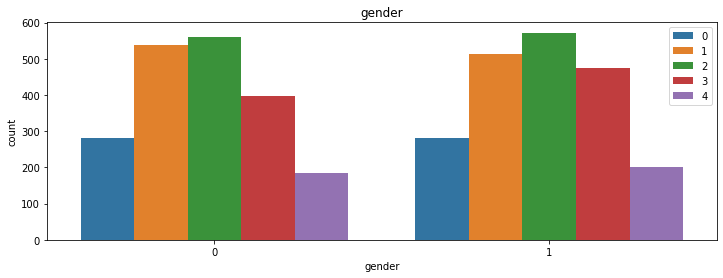

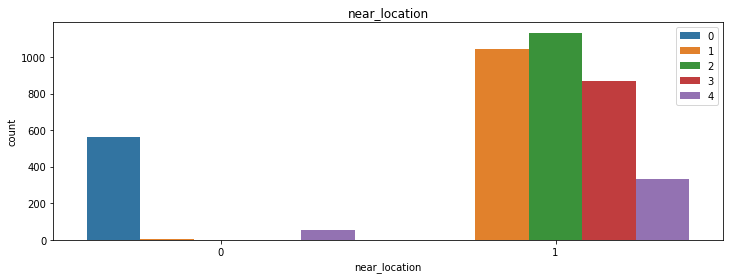

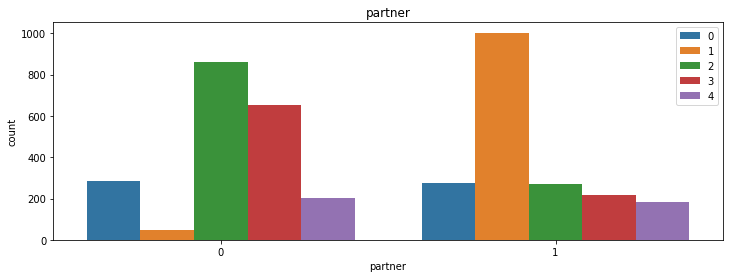

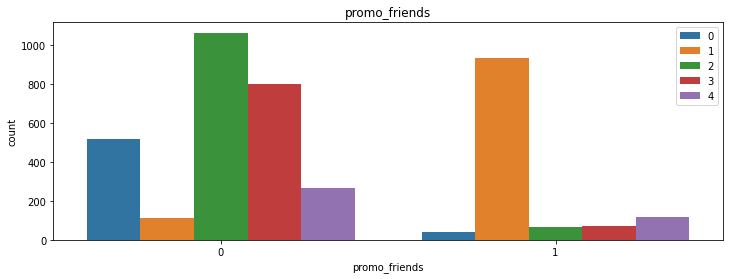

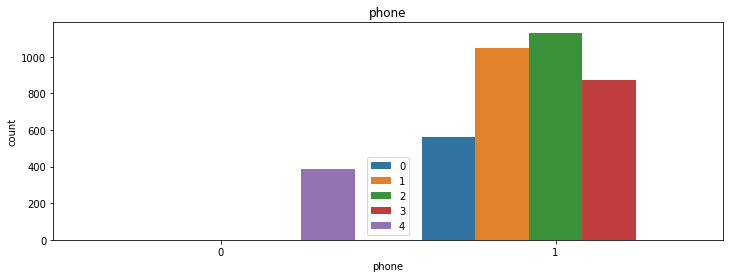

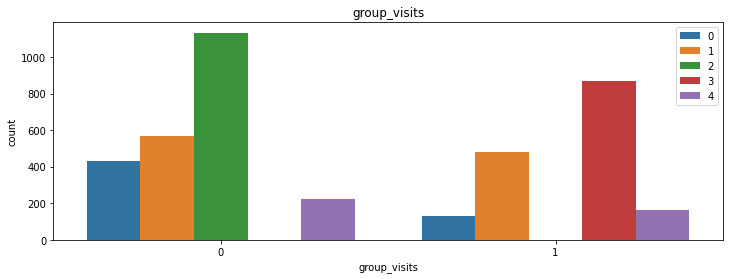

In [34]:
# plotting distributions of boolean features for clusters
for column in bool_features:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=gym[column].astype(int), hue='cluster_km', data=gym)
    plt.title(column)
    plt.legend()
    plt.show()

The following boolean features distinguish clusters:
- In terms of the `gender`, nothing stands out;
- In terms of the `near_location`, cluster 0 stands out, those who live far away;
- In terms of the `partner`, clusters 0, 2 and 3 are not partners, cluster 1 is;
- In terms of the `promo_friends`, clusters 0, 2 and 3 came independently (they are not partners), cluster 1 came as a promotion (partners);
- In terms of the `phone`, cluster 4 did not leave a phone number;
- In terms of the `group_visits`, cluster 2 does not attend group classes. Cluster 3 attends group classes.

In [35]:
# displaying on the screen
print('Numerical features:', non_bool_features)

Numerical features: ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


In [36]:
# removing columns
non_bool_features.remove('month_to_end_contract')
non_bool_features.remove('avg_class_frequency_current_month')

# displaying on the screen
print(non_bool_features)

['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']


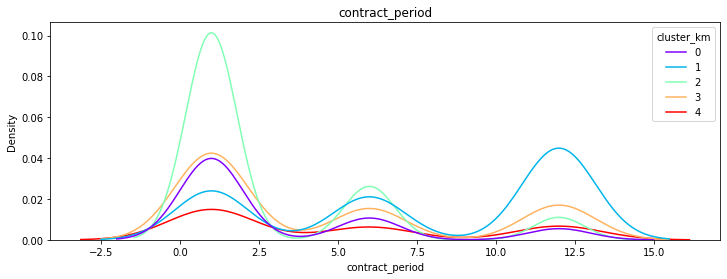

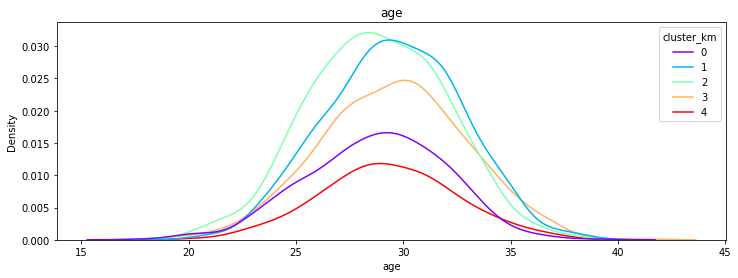

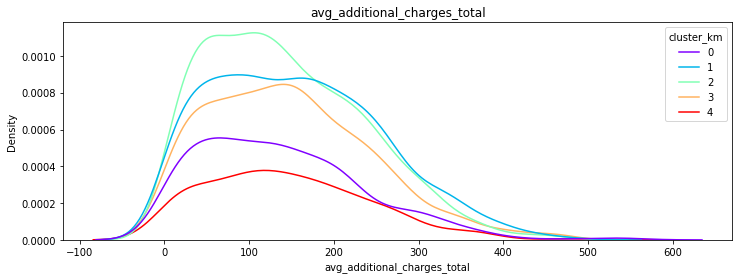

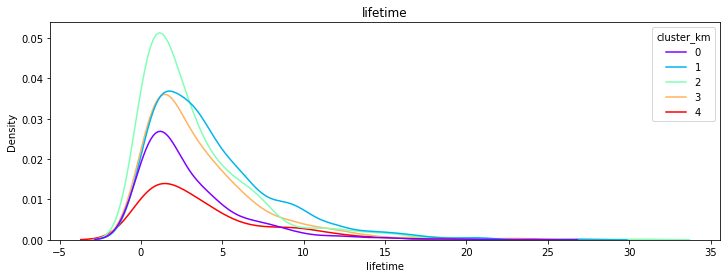

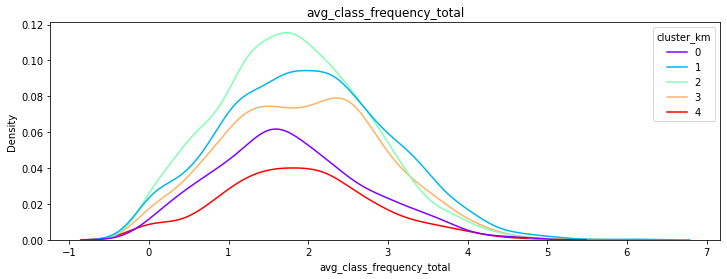

In [37]:
# plotting distributions of numerical features for clusters
for column in non_bool_features:
    plt.figure(figsize=(12, 4))
    sns.kdeplot(x=gym[column], hue='cluster_km', data=gym, palette='rainbow', legend = True)
    plt.title(column)
    plt.show()

The following numerical features distinguish clusters:

- In terms of the `contract_period`, subscriptions are available for 1, 6, and 12 months. Clusters 1 consists primarily of 12-month subscriptions, and cluster 2 of 1-month subscriptions.

- In terms of the `age`, cluster 1 primarily consists of people over 30 years old, while cluster 2 consists of those who are 30 years old or younger.

- In terms of the `avg_additional_charges_total`, cluster 1 spends over 200 (over 30 years), and cluster 2 spends up to 250 (up to 30 years).

- In terms of the `lifetime`, in cluster 1, those who have been visiting for more than 5 months, and in cluster 2, those who have been visiting for less than 5 months.

- In terms of the `avg_class_frequency_total`, cluster 1 includes those who visit 2-3 times per week, and cluster 2 includes those who visit on average 1-2 times per week.

### Identifying each cluster's outflow share

In [38]:
# calculating the percentage of customer outflow
outflow = gym.groupby('cluster_km')['churn'].sum() / gym.groupby('cluster_km')['churn'].count()
outflow.sort_values(ascending = False)

cluster_km
0    0.399287
2    0.381625
4    0.266839
3    0.200918
1    0.120952
Name: churn, dtype: float64

- Clusters 0 (39.9%) and 2 (38.2%) had the largest outflow, and cluster 1 (12.1%) had the smallest. Clusters 3 (20.1%) and 4 (26.7) had the average outflow.

**Conclusion**

1. Five large clusters of clients can be identified on the dendrogram.
2. There are 386 clients in the smallest group and 1132 clients in the largest group.
3. Based on the Silhouette_score = 0.14, the clustering wasn't very good.
4. Clusters have the following characteristics:
    - Cluster 0:
        - `near_location` - 100% live far away;
        - `partner` - 49% of customers come from partner companies;
        - `group_visits` - low level of group visits 23%;
        - `lifetime` - almost 3 months since the first visit.
        - All of these clients live far away, almost half came through an affiliate program and visit only 3 months. Group classes are rare. The outflow will likely be large among these customers.

    - Cluster 1:
        - `near_location` - live nearby to 99%;
        - `partner` - partnership share 95%;
        - `promo_friends` - recomended by a friend 89%;
        - `contract_period` - almost 8 months;
        - `group_visits` - the average level of attending group classes is 46%;
        - `lifetime` - almost 5 months (the highest rate) since the first visit;
        - `avg_class_frequency_total` is the highest 1.98%.
        - These clients live nearby, came through an affiliate program or promotion, have an 8-month contract, attend group classes, almost 5 months since first visit, attend twice a week. Most likely, the outflow of such customers will be minimal.

    - Cluster 2:
        - `near_location` - 100% live nearby;
        - `contract_period` - almost 3 months;
        - `group_visits` - do not attend group classes 0%.
        - These clients live nearby, have a 3-month contract and do not attend group classes at all. Most likely, the outflow of such customers will be large.

    - Cluster 3:
        - `near_location` - 100% live nearby;
        - `group_visits` - group classes attendance 100%;
        - `avg_class_frequency_total` - visit almost 2 times a week 1.94%.
        - These clients live nearby, visit twice a week and attend group classes. Most likely, the outflow of such customers will be average.

    - Cluster 4:
        - `near_location` - 86% live nearby;
        - `partner` - the average level of partnership 47%;
        - `contract_period` - almost 5 months;
        - `phone` - left phone number 0%;
        - `avg_class_frequency_total` - go almost 2 times a week 1.85%.
        - These clients live mostly nearby, visit about twice a week, have a 5-month contract, almost half came through an affiliate program. Most likely, the outflow of such customers will be average.

5. 
    - The following boolean features distinguish clusters:
        - In terms of the `gender`, nothing stands out;
        - In terms of the `near_location`, cluster 0 stands out, those who live far away;
        - In terms of the `partner`, clusters 0, 2 and 3 are not partners, cluster 1 is;
        - In terms of the `promo_friends`, clusters 0, 2 and 3 came independently (they are not partners), cluster 1 came as a promotion (partners);
        - In terms of the `phone`, cluster 4 did not leave a phone number;
        - In terms of the `group_visits`, cluster 2 does not attend group classes. Cluster 3 attends group classes.

    - The following numerical features distinguish clusters:

        - In terms of the `contract_period`, subscriptions are available for 1, 6, and 12 months. Clusters 1 consists primarily of 12-month subscriptions, and cluster 2 of 1-month subscriptions.

        - In terms of the `age`, cluster 1 primarily consists of people over 30 years old, while cluster 2 consists of those who are 30 years old or younger.

        - In terms of the `avg_additional_charges_total`, cluster 1 spends over 200 (over 30 years), and cluster 2 spends up to 250 (up to 30 years).

        - In terms of the `lifetime`, in cluster 1, those who have been visiting for more than 5 months, and in cluster 2, those who have been visiting for less than 5 months.

        - In terms of the `avg_class_frequency_total`, cluster 1 includes those who visit 2-3 times per week, and cluster 2 includes those who visit on average 1-2 times per week.

6. Clusters 0 (39.9%) and 2 (38.2%) had the largest outflow, and cluster 1 (12.1%) had the smallest. Clusters 3 (20.1%) and 4 (26.7) had the average outflow.

## Final conclusion

**Exploratory data analysis**

1. Portrait of a typical client:
    - An average client is 29 years old;
    - the current active subscription is about 5 months long;
    - 147 spent on additional services;
    - before the end of the contract, on average, about 4 months remain;
    - on average, it has been about 4 months since the first visit to the gym;
    - the gym is visited about twice a week.

2. We can conclude that those who stayed (churn = 0) often live nearby, work for the club's partner company, come to the club under the "bring a friend" promotion, have a subscription for 5.7 months, and attend group classes. Their average age is almost 30 years old. They bring in more total revenue from other services at the fitness center, and they have an average duration of 5.2 months for their current subscription. On average, the remaining clients have been using the fitness center for 4.7 months and they attend classes twice a week.

3. Our analysis of the features of those who left (churn) and those who stayed shows the following:

    - In terms of `gender`, there are about the same number of female and male customers, and about the percentage of lost customers. As a result, a client's decision to leave has nothing to do with his/her gender. Models cannot be trained using this feature;

    - In terms of `near_location`, the proportion of customers who left for option 1 is less than half, and the proportion who left for option 0 is more than half. That is, the outflow is more for customers who live/work far from the gym;

    - In terms of `partner`, customers from partner companies and other customers have similar shares. Partners, however, have a much lower share of those who left. We must work more actively with partners, expand their networks, and attract more such customers;

    - In terms of `promo_friends`, while fewer people are participating in the promo action, the share of those who remain is much higher. As a result of the campaign, loyal customers were collected;

    - In terms of `phone`, the proportion of customers who have left their phone number is approximately the same for options 1 and 0. Therefore, a client's decision to leave has nothing to do with whether or not they left their phone number;

    - In terms of `group_visits`, the churn rate among those who don't attend group classes is higher than that among those who do.

    - In terms of `contract_period`, most of the outflow comes from those who take a subscription for a month. The smallest outflow comes from those who take a subscription for a year. These are the most stable customers;

    - In terms of `age`, clients aged 24-30 are more likely to leave, but older clients are more likely to stay;

    - In terms of `avg_additional_charges_total`, those who spend less than 350 on additional services tend to leave;

    - In terms of `month_to_end_contract`, the main churn is among customers with 1 month remaining on their subscription. The more time left, the stronger the desire to continue going to gym;

    - In terms of `lifetime`, most outflows come from people who go to the gym for less than five months;

    - In terms of `avg_class_frequency_total`, the gym churn rate is higher for ciustomers who visit up to two times a week. If the client visits three times or more, the outflow is minimal, or none at all. But such customers are rare;

    - In terms of `avg_class_frequency_current_month`, the higher the frequency of club visits, the lower the churn rate. 

4. The feature correlation matrix suggests that all features are weakly correlated. There is an inverse correlation between `churn` and the rest of the features - the stronger the feature, the weaker the churn.

    - There is a very strong (above 0.95) correlation of feature pairs:
        - `contract_period` and `month_to_end_contract` - the longer the subscription period, the more likely there are still months left;
        - `avg_class_frequency_current_month` and `avg_class_frequency_total` - those who have been visiting regularly for a long time is probably visiting on the same schedule for the past month.
        - Removed `month_to_end_contract`, `avg_class_frequency_current_month` features from pairs of correlated features as they can negatively affect model training.

**Forecast**

While both models performed well, "Logistic Regression" performed slightly better:
- the Accuracy parameter suggests that "Logistic regression" outperforms "Random forest" slightly (0.90 vs. 0.89);
- the Precision parameter suggests that "Logistic regression" outperforms "Random Forest" slightly (0.83 vs. 0.81);
- the Recall parameter suggests that "Logistic regression" outperforms "Random Forest" slightly (0.80 vs. 0.79).

**Clustering**

As a result of the analysis, 5 clusters have been identified:

- Cluster 0 - had the largest outflow of 39.9%. All of these clients live far away, almost half came through an affiliate program and visit only 3 months. Group classes are rare. The outflow will likely be large among these customers.

- Cluster 1 - had the smallest outflow of 12.1%. These clients live nearby, came through an affiliate program or promotion, have an 8-month contract, attend group classes, almost 5 months since first visit, attend twice a week. Most likely, the outflow of such customers will be minimal.

- Cluster 2 - had the largest outflow of 38.2%. These clients live nearby, have a 3-month contract and do not attend group classes at all. Most likely, the outflow of such customers will be large.

- Cluster 3 - had the average outflow of 20.1%. These clients live nearby, visit twice a week and attend group classes. Most likely, the outflow of such customers will be average.

- Cluster 4 - These clients live mostly nearby, visit about twice a week, have a 5-month contract, almost half came through an affiliate program. Most likely, the outflow of such customers will be average.

**Recommendations**

Our target audience:
- Local residents;
- Those who are over 30.

Need to attract customers:
- more profitable affiliate programs and promotions;
- more profitable subscriptions for 12 months;
- a variety of group activities;
- encouraging customers to visit the gym more than twice a week.